# Анализ месторождений компании «ГлавРосГосНефть»
    
Мы работаем в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Нам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Задача - построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируем возможную прибыль и риски техникой *Bootstrap.*

Концепция выбора локации обычно такая:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.
    
    
Предоставленная информация представляет собой три датасета для трех разных регионов, с информацией о примерно ста тысячах точек в каждом из них. Мы не знаем, что представляют собой признаки. Id скважин закодированы. Единственная прямо известная величина - предполагаемые объемы возможной добычи.
    
____



В данной работе представлен процесс создания и проверки модели машинного обучения в целях формирования правильного бизнес-решения. Работа произведена в соответствии с инструкциями заказчика. Каждый значительный шаг сопровождается промежуточным, либо общим выводом.
    
____
    
    
    
Часть 1. Изучение общей информации о предоставленном датасете
    
1. Импорт необходимых библиотек для работы с данными, загрузка датасетов
2. Изучение данных, получение общей информации
3. Оценка мультиколлинеарности признаков
4. Вывод

    
Часть 2. Работа над моделями

1. Разбиение данных
2. Масштабирование признаков
3. Обучение моделей
4. Вывод
    
Часть 3. Подготовка к расчету прибыли
    
1. Подготовка к расчету прибыли
2. Вывод
    
Часть 4. Расчет прибыли
    
1. Расчет прибыли в идеальных условиях
2. Расчет рисков и прибыли для каждого региона
3. Вывод
    
Часть 5. Общий вывод
1. Общий вывод о проделанной работе

 ## Часть 1. Изучение общей информации о предоставленном датасете

<a id='Импорт необходимых библиотек для работы с данными, загрузка датасетов'>

### <p style="text-align:center"> Импорт необходимых библиотек для работы с данными, загрузка датасетов</p>

Загружаем необходимые библиотеки для работы с данными. Разбиваем их на три смысловых блока.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.max_columns = None
import warnings
warnings.simplefilter('ignore')

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler 

In [4]:
!pip install scikit-learn --upgrade # вроде бы помогает избежать некоторых ошибок

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: scikit-learn in /home/jovyan/.local/lib/python3.7/site-packages (0.24.1)


Загружаем датасеты, проверяем вывод.

In [5]:
data_1 = pd.read_csv('/datasets/geo_data_0.csv')
data_2 = pd.read_csv('/datasets/geo_data_1.csv')
data_3 = pd.read_csv('/datasets/geo_data_2.csv')

In [6]:
data_1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [7]:
data_2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [8]:
data_3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<a id='Изучение данных, получение общей информации'></a>

### <p style="text-align:center"> Изучение данных, получение общей информации</p>

Ознакомимся с информацией, посмотрим соответствуют ли типы ячеек назначению. В качестве дополнительной проверки возьмем случайные 20 строк из нашего датасета, посмотрим на странные, выбивающиеся, отсутствующие значения.

In [9]:
data_1.sample(n=20, random_state=1)

,id,f0,f1,f2,product
43660,MUOMg,0.951436,0.296027,6.817623,89.929339
87278,OZXkj,0.800004,0.231734,-2.650680,94.203721
14317,adoVK,0.726819,-0.422117,2.645328,123.553649
81932,8rZOO,0.193998,-0.247002,-1.002114,83.166422
95321,RyFFq,0.890555,-0.498876,4.448591,146.285652
5405,tBLU2,0.891637,0.593734,4.120652,144.004516
33188,9ahU2,-0.898312,0.452936,6.443870,83.785154
63421,xiiVU,0.428196,-0.193968,0.649134,104.761145
72897,5OJkk,1.624071,-0.265819,-0.728902,48.124742
9507,tdQ7o,1.901850,-0.068596,4.012660,155.625236


In [10]:
data_2.sample(n=20, random_state=2)

,id,f0,f1,f2,product
6448,UH2TV,13.392314,-11.167542,2.997332,80.859783
50680,0vrnv,7.297920,-7.118898,0.000047,0.000000
814,jRD7Y,-1.908581,-16.298396,0.005746,0.000000
20354,74iWM,10.091034,-3.356885,1.001110,26.953261
49224,ZMBxe,-7.004343,-6.190416,2.996468,84.038886
96712,LCDCm,-4.488875,-0.880741,1.003158,26.953261
76353,ajEyy,-12.822312,-1.089717,0.996685,30.132364
91607,JMRx6,4.485587,7.268927,3.001839,80.859783
65153,IIoyv,-4.236561,-13.315800,0.008354,3.179103
13542,sFboR,11.315497,-1.361467,2.001713,53.906522


In [11]:
data_3.sample(n=20, random_state=3)

,id,f0,f1,f2,product
79528,IzPst,0.194647,2.469580,0.458417,56.324969
53876,Og4zw,-3.099415,3.781137,3.376006,159.510230
9777,J2FB8,-0.432362,0.228315,5.840886,106.784053
6167,hKW1X,-1.095537,-0.854953,8.423223,122.134032
22020,K7U15,1.794371,-0.820678,10.475420,120.791430
85042,ggXMK,0.294920,-0.482935,1.391220,38.981639
14758,pnsAQ,0.830345,1.204876,1.403620,83.242309
65017,8O0fw,3.266574,0.714168,3.840849,120.457457
97903,GDVoJ,-0.586365,1.103559,2.389679,106.010855
84654,OOux6,-2.497178,1.119071,-3.205636,94.972974


Иногда в таблицах в конце есть строка "Итого"(или т.п.), нам она не нужна, убедимся в ее отсутствии.

In [12]:
data_1.tail()

,id,f0,f1,f2,product
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764
99999,1CWhH,1.764754,-0.266417,5.722849,149.633246


In [13]:
data_2.tail()

,id,f0,f1,f2,product
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364
99999,relB0,-3.426139,-7.794274,-0.003299,3.179103


In [14]:
data_3.tail()

,id,f0,f1,f2,product
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253
99999,V9kWn,-2.551421,-2.025625,6.090891,102.775767


In [15]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [16]:
data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [17]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [18]:
data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [19]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [20]:
data_3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


<a id='Оценка мультиколлинеарности признаков'></a>

### <p style="text-align:center"> Оценка мультиколлинеарности признаков </p>

В качестве оценки мультиколлинеарности признаков найдем коффициенты корреляции этих признаков, если зависимость сильнее 0.75 попытаемся оставить только один признак из двух.

In [21]:
data_1.drop(['id', 'product'], axis=1).corr()

,f0,f1,f2
f0,1.000000,-0.440723,-0.003153
f1,-0.440723,1.000000,0.001724
f2,-0.003153,0.001724,1.000000


In [22]:
data_2.drop(['id', 'product'], axis=1).corr()

,f0,f1,f2
f0,1.000000,0.182287,-0.001777
f1,0.182287,1.000000,-0.002595
f2,-0.001777,-0.002595,1.000000


In [23]:
data_3.drop(['id', 'product'], axis=1).corr()

,f0,f1,f2
f0,1.000000,0.000528,-0.000448
f1,0.000528,1.000000,0.000779
f2,-0.000448,0.000779,1.000000


Не похоже, что у нас присутствуют признаки с сильными линейными зависимостями, поэтому визуализировать не будем.

Воспользуемся удобной для первичного анализа библиотекой и создадим отчеты автоматически.

In [24]:
# !pip install pandas-profiling

In [25]:
# import pandas_profiling

In [26]:
# profile_data_1 = pandas_profiling.ProfileReport(data_1, title = 'Explorative data 1 report', explorative = True)
# profile_data_1

In [27]:
# profile_data_2 = pandas_profiling.ProfileReport(data_2, title = 'Explorative data 2 report', explorative = True)
# profile_data_2

In [28]:
# profile_data_3 = pandas_profiling.ProfileReport(data_3, title = 'Explorative data 3 report', explorative = True)
# profile_data_3

<a id='Вывод_1'></a>

### <p style="text-align:center"> Вывод</p>

##### В ходе первичного анализа данных были  сделаны следующие выводы:

___


1. Типы в общем случае соответствуют назначению, но обладают повышенной емкостью (например, имеют тип данных float64 там, где достаточно float16).


2. В столбце id некоторые скважины встречаюстя несколько раз. Решим что с ними делать в следующей части. Также этот столбец не поможет обучению, удалим его.


3. Возможно, данные нуждаются в масштабировании.


___

Таким образом было выполнено первичное ознакомление с предоставленной информацией, выявлены некоторые дефекты датасета. Можно сказать, что данные не нуждаются в предобработке. Разберемся с этим в следующей части.

 ## Часть 2. Работа над моделями 

<a id='Разбиение данных'>

### <p style="text-align:center"> Разбиение данных </p>

In [29]:
features_1 = data_1.drop(['id', 'product'], axis=1)
target_1 = data_1['product']

In [30]:
features_2 = data_2.drop(['id', 'product'], axis=1)
target_2 = data_2['product']

In [31]:
features_3 = data_3.drop(['id', 'product'], axis=1)
target_3 = data_3['product']

In [32]:
features_1_train, features_1_valid, target_1_train, target_1_valid = train_test_split(features_1, target_1, 
                                                                                      test_size=0.25, random_state=228)

In [33]:
features_2_train, features_2_valid, target_2_train, target_2_valid = train_test_split(features_2, target_2, 
                                                                                      test_size=0.25, random_state=228)

In [34]:
features_3_train, features_3_valid, target_3_train, target_3_valid = train_test_split(features_3, target_3, 
                                                                                      test_size=0.25, random_state=228)

Проверим разбиение.

In [35]:
print('Признаки обучающей выборки №1:',features_1_train.shape,
      'Целевой признак обучающей выборки №1:', target_1_train.shape, 
      'Признаки валидационной выборки №1:',features_1_valid.shape,  
      'Целевой признак валидационной выборки №1:', target_1_valid.shape)
print('Признаки обучающей выборки №2:',features_2_train.shape,
      'Целевой признак обучающей выборки №2:', target_2_train.shape, 
      'Признаки валидационной выборки №2:',features_2_valid.shape,  
      'Целевой признак валидационной выборки №2:', target_2_valid.shape)
print('Признаки обучающей выборки №3:',features_3_train.shape,
      'Целевой признак обучающей выборки №3:', target_3_train.shape, 
      'Признаки валидационной выборки №3:',features_3_valid.shape,  
      'Целевой признак валидационной выборки №3:', target_3_valid.shape)

Признаки обучающей выборки №1: (75000, 3) Целевой признак обучающей выборки №1: (75000,) Признаки валидационной выборки №1: (25000, 3) Целевой признак валидационной выборки №1: (25000,)
Признаки обучающей выборки №2: (75000, 3) Целевой признак обучающей выборки №2: (75000,) Признаки валидационной выборки №2: (25000, 3) Целевой признак валидационной выборки №2: (25000,)
Признаки обучающей выборки №3: (75000, 3) Целевой признак обучающей выборки №3: (75000,) Признаки валидационной выборки №3: (25000, 3) Целевой признак валидационной выборки №3: (25000,)


<a id='Масштабирование признаков'></a>

### <p style="text-align:center"> Масштабирование признаков </p>

Проведем масштабирование.

In [36]:
numeric = ['f0', 'f1', 'f2']

In [37]:
scaler_1 = StandardScaler()
scaler_1.fit(features_1_train[numeric])

StandardScaler()

In [38]:
features_1_train[numeric] = scaler_1.transform(features_1_train[numeric])
features_1_valid[numeric] = scaler_1.transform(features_1_valid[numeric])

Проверяем.

In [39]:
features_1_train.head()

,f0,f1,f2
84274,-0.353215,-1.297495,-0.589754
52991,-0.366233,-0.580836,0.501589
40819,-0.054493,1.238052,-1.193316
80230,0.003611,1.395170,-0.661725
18616,-1.865084,-0.504188,-0.097641


In [40]:
features_1_valid.head()

,f0,f1,f2
80393,0.070321,-1.523447,0.387739
90479,-0.366620,-0.894014,0.320269
96406,-1.720091,-0.761553,-1.204655
6909,-0.297527,-0.580666,-1.499910
48361,0.717871,-1.551500,-0.024272


In [41]:
scaler_2 = StandardScaler()
scaler_2.fit(features_2_train[numeric])

StandardScaler()

In [42]:
features_2_train[numeric] = scaler_2.transform(features_2_train[numeric])
features_2_valid[numeric] = scaler_2.transform(features_2_valid[numeric])

Проверяем.

In [43]:
features_2_train.head()

,f0,f1,f2
84274,-0.457595,-1.210513,0.882921
52991,-1.618225,0.058094,-1.463246
40819,1.077679,1.003846,-0.289820
80230,0.623040,0.424541,0.293118
18616,-1.618175,0.467740,0.302640


In [44]:
features_2_valid.head()

,f0,f1,f2
80393,2.748173,0.997440,1.464363
90479,0.452976,0.062983,1.474064
96406,0.488011,-1.300109,0.293559
6909,0.239895,-0.921739,1.469267
48361,1.353588,0.753772,-0.294825


In [45]:
scaler_3 = StandardScaler()
scaler_3.fit(features_3_train[numeric])

StandardScaler()

In [46]:
features_3_train[numeric] = scaler_3.transform(features_3_train[numeric])
features_3_valid[numeric] = scaler_3.transform(features_3_valid[numeric])

In [47]:
features_3_train.head()

,f0,f1,f2
84274,-1.517905,0.567483,-0.604187
52991,0.118599,0.458628,1.300742
40819,1.569141,0.385575,-0.288143
80230,-0.044902,1.402225,0.767338
18616,1.084611,0.639228,-2.059007


In [48]:
features_3_valid.head()

,f0,f1,f2
80393,-1.343738,-1.909776,0.289160
90479,-0.153430,1.447530,-0.728326
96406,-0.857821,-2.298749,-0.976981
6909,0.553228,-0.012195,-1.525814
48361,0.119355,-0.678262,1.259634


<a id='Обучение моделей'></a>

### <p style="text-align:center"> Обучение моделей </p>

Обучим модели, проставим заново индексы таргетов.

In [49]:
Lin_Reg_1 = LinearRegression(n_jobs=-1)
prediction_1 = pd.DataFrame(Lin_Reg_1.fit(features_1_train, target_1_train).predict(features_1_valid))[0]
target_1_valid = target_1_valid.reset_index(drop=True)
RMSE_1 = mean_squared_error(target_1_valid, prediction_1, squared=False)

In [50]:
Lin_Reg_2 = LinearRegression(n_jobs=-1)
prediction_2 = pd.DataFrame(Lin_Reg_2.fit(features_2_train, target_2_train).predict(features_2_valid))[0]
target_2_valid = target_2_valid.reset_index(drop=True)
RMSE_2 = mean_squared_error(target_2_valid, prediction_2, squared=False)

In [51]:
Lin_Reg_3 = LinearRegression(n_jobs=-1)
prediction_3 = pd.DataFrame(Lin_Reg_3.fit(features_3_train, target_3_train).predict(features_3_valid))[0]
target_3_valid = target_3_valid.reset_index(drop=True)
RMSE_3 = mean_squared_error(target_3_valid, prediction_3, squared=False)

In [52]:
print('Средний запас предсказанного сырья для 1-го региона:', prediction_1.mean())
print('RMSE для 1-го региона:', RMSE_1) 

Средний запас предсказанного сырья для 1-го региона: 92.5754713382646
RMSE для 1-го региона: 37.71475103338733


In [53]:
print('Средний запас предсказанного сырья для 2-го региона:', prediction_2.mean())
print('RMSE для 2-го региона:', RMSE_2)

Средний запас предсказанного сырья для 2-го региона: 68.70640410668202
RMSE для 2-го региона: 0.8887425405494614


In [54]:
print('Средний запас предсказанного сырья для 3-го региона:', prediction_3.mean())
print('RMSE для 3-го региона:', RMSE_3)

Средний запас предсказанного сырья для 3-го региона: 94.97095602081706
RMSE для 3-го региона: 39.93783079331951


<a id='Вывод_2'></a>

### <p style="text-align:center"> Вывод</p>

##### В ходе работы с моделями пришли к следующему:

___


1. Провели разбиение данных, а затем и масштабирование.


2. На основе этих данных провели обучение моделей.


3. Предсказали средний запас сырья для каждого региона. 


Из интересного у нас следующее: нельзя не заметить, что во втором регионе у нас ниже количество предполагаемого сырья, но и ошибка совсем небольшая, в отличие от остальных регионов, где больше предпологаемого сырья, но и ошибка значительно выше.
___

Таким образом была выполнена работа с моделями. Переходим к следующей части анализа.

 ## Часть 3. Подготовка к расчету прибыли

<a id='Подготовка к расчету прибыли'></a>

### <p style="text-align:center">Подготовка к расчету прибыли</p>

In [55]:
BILLION = 1000000000
BUDGET = 10*BILLION
BARREL = 450000
GAS_WELL_COUNT = 200

In [56]:
min_production = BUDGET/(GAS_WELL_COUNT*BARREL)
min_production

111.11111111111111

Сравнивая полученное значение со средним запасов скважин каждого региона можно увидеть, что в каждом из регионов в каждой скважине в среднем меньше запас сырья, чем необходимо для безубыточной добычи. Поэтому необходимо применить аналитический подход и машинное обучение.

<a id='Вывод_3'></a>

### <p style="text-align:center"> Вывод</p>

##### В ходе работы по подготовке мы:

___


1. Создали константы с интересующими нас величинами.


2. На основе этих константы посчитали минимальное среднее количество сырья для одной скважины.


3. Сравнили полученное значение с предсказаниями для каждого региона. 



___

Таким образом была выполнена работа по подготовке к расчету прибыли. Переходим к следующей части анализа.

 ## Часть 4. Расчет прибыли

<a id='Расчет прибыли в идеальных условиях'></a>

### <p style="text-align:center">Расчет прибыли в идеальных условиях</p>

Напишем функцию для расчета прибыли.

In [57]:
def get_profit(prediction, target):
    prediction_sorted = prediction.sort_values(ascending=False)
    selected = target[prediction_sorted.index][:GAS_WELL_COUNT]
    return selected.sum()*BARREL/BILLION - BUDGET/BILLION

Посчитаем прибыль для каждого региона.

In [58]:
profit_1 = get_profit(prediction_1, target_1_valid)
print(f'Прибыль от полученного объема сырья в 1-м регионе составит {(profit_1):.3f} млрд. рублей.')

Прибыль от полученного объема сырья в 1-м регионе составит 3.372 млрд. рублей.


In [59]:
profit_2 = get_profit(prediction_2, target_2_valid)
print(f'Прибыль от полученного объема сырья в 2-м регионе составит {(profit_2):.3f} млрд. рублей.')

Прибыль от полученного объема сырья в 2-м регионе составит 2.415 млрд. рублей.


In [60]:
profit_3 = get_profit(prediction_3, target_3_valid)
print(f'Прибыль от полученного объема сырья в 3-м регионе составит {(profit_3):.3f} млрд. рублей.')

Прибыль от полученного объема сырья в 3-м регионе составит 2.522 млрд. рублей.


<a id='Расчет рисков и прибыли для каждого региона'></a>

### <p style="text-align:center">Расчет рисков и прибыли для каждого региона</p>

Расчитаем риски убытков, прибыли и доверительные интервалы для каждого региона. Воспользуемся техникой Bootstrap.

In [61]:
state = np.random.RandomState(85)

Создадим функцию для расчета интересующих нас характеристик.

In [62]:
def get_characteristics(prediction, target_valid):
    values = []
    for i in range(1000):
        prediction_subsample = prediction.sample(n=500, replace=True, random_state=state)
        target_subsample = target_valid[prediction_subsample.index]
        value = get_profit(prediction_subsample, target_subsample)
        values.append(value)
    sample = pd.Series(values)
    risks = (sample < 0).mean()*100
    conf_int_lower = sample.quantile(0.025)
    conf_int_upper = sample.quantile(0.975)
    return [sample.mean(), risks, conf_int_lower, conf_int_upper, values]

In [63]:
def print_characteristics(characteristics, region):
    print(f'Cредняя прибыль, {region}-й регион: {characteristics[0]:.3f} млрд. рублей.')
    print(f'95%-ый дов-ный интервал, {region}-й регион: от {characteristics[2]:.3f} до {characteristics[3]:.3f} млрд. рублей.')
    print(f'Риск убытков, {region}-й регион: {characteristics[1]:.1f}%')

In [64]:
characteristics_1 = get_characteristics(prediction_1, target_1_valid)

In [65]:
print_characteristics(characteristics_1, 1)

Cредняя прибыль, 1-й регион: 0.454 млрд. рублей.
95%-ый дов-ный интервал, 1-й регион: от -0.098 до 0.991 млрд. рублей.
Риск убытков, 1-й регион: 6.1%


In [66]:
characteristics_2 = get_characteristics(prediction_2, target_2_valid)

In [67]:
print_characteristics(characteristics_2, 2)

Cредняя прибыль, 2-й регион: 0.496 млрд. рублей.
95%-ый дов-ный интервал, 2-й регион: от 0.090 до 0.926 млрд. рублей.
Риск убытков, 2-й регион: 0.6%


In [68]:
characteristics_3 = get_characteristics(prediction_3, target_3_valid)

In [69]:
print_characteristics(characteristics_3, 3)

Cредняя прибыль, 3-й регион: 0.335 млрд. рублей.
95%-ый дов-ный интервал, 3-й регион: от -0.190 до 0.878 млрд. рублей.
Риск убытков, 3-й регион: 11.1%


In [70]:
d = {'region': ['1-st', '2-nd', '3-rd'], 
     'mean_profit, billion rub':[characteristics_1[0], characteristics_2[0], characteristics_3[0]],
     'risks, %':[characteristics_1[1], characteristics_2[1], characteristics_3[1]],
     'confidence_interval_lower, billion rub':[characteristics_1[2], characteristics_2[2], characteristics_3[2]],
     'confidence_interval_upper, billion rub':[characteristics_1[3], characteristics_2[3], characteristics_3[3]]
    }
summary = pd.DataFrame(data=d).round(3)

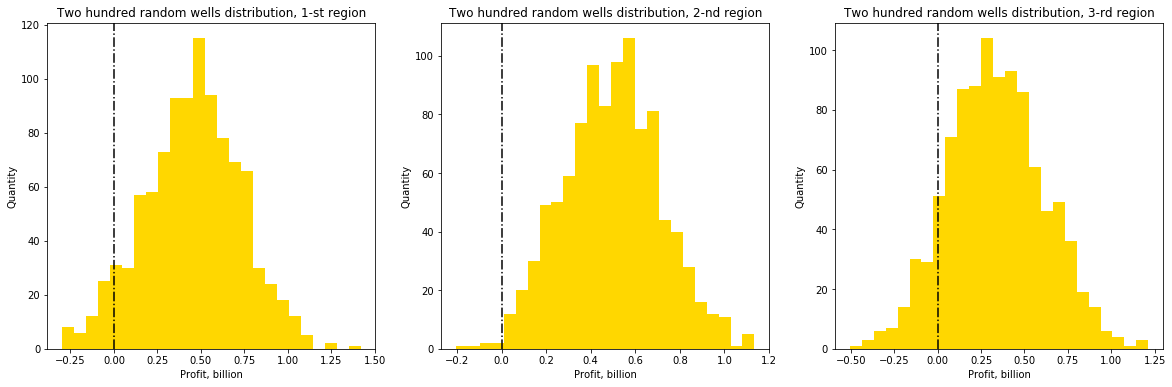

In [71]:
f, axs = plt.subplots(1, 3, figsize=(20,6))
zero = 0

axs[0].hist(characteristics_1[4], color='gold', bins = 25);
axs[0].axvline(zero, color='black', linestyle='dashdot')
axs[0].set_title('Two hundred random wells distribution, 1-st region');
axs[0].set_xlabel('Profit, billion');
axs[0].set_ylabel('Quantity');

axs[1].hist(characteristics_2[4], color='gold', bins = 25);
axs[1].axvline(zero, color='black', linestyle='dashdot')
axs[1].set_title('Two hundred random wells distribution, 2-nd region');
axs[1].set_xlabel('Profit, billion');
axs[1].set_ylabel('Quantity');

axs[2].hist(characteristics_3[4], color='gold', bins = 25);
axs[2].axvline(zero, color='black', linestyle='dashdot')
axs[2].set_title('Two hundred random wells distribution, 3-rd region');
axs[2].set_xlabel('Profit, billion');
axs[2].set_ylabel('Quantity');

<a id='Вывод_4'></a>

### <p style="text-align:center"> Вывод</p>

##### В ходе работы по расчету прибыли мы:

___


1. Выполнили расчет прибыли в идеальных условиях - взяли 200 самых прибыльных скважин из предсказания по всей валидационной выборке и оставили просуммировали целевое значение объёма сырья, соответствующее этим предсказаниям. Получили максимально возможную прибыль с региона.


2. Воспользовавшись техникой Bootstrap приблизили ситуацию к реальной жизни, где есть возможность исследовать только 500 точек и взять из них 200. Проделали это 1000 раз для каждого региона, получили распределения возможной прибыли, риски убытков, доверительные интервалы.


3. Визуализировали интересующие нас данные. 


___



Таким образом была выполнена работа по расчету прибыли. Переходим к выводам.

 ## Часть 5. Общий вывод

<a id='Вывод_5'></a>

### <p style="text-align:center"> Вывод по проделанной работе</p>

##### В ходе работы мы:

___


1. <a href='#Вывод_1'>Изучили</a> общую информацию о предоставленных датасетах. Проблем на данном этапе не нашли.


2. <a href='#Вывод_2'>Поработали</a> над моделями машинного обучения на основе предоставленных данных. Обучили модели для каждого региона.


3. <a href='#Вывод_3'>Подготовились</a> к расчету прибыли - вынесли основные константы, посчитали минимальный средний запас скважины.


4. <a href='#Вывод_4'>Расчитали</a> прибыли в идеальных условиях, и в условиях приближенных к реальным, для каждого региона. Не забыли про риски и доверительные интервалы.


___



Таким образом была выполнена работа по анализу и формированию выводов на основе имеющейся информации. 

В качестве региона для разработки мы рекомендуем <b>2-й регион</b>, на основании следующего:

- после обучения моделей мы увидели, что в каждом из регионов средний предсказанный запас скважины был ниже, чем необходимо. Во 2-м регионе эта цифра была самой низкой, но это не привело нас к неправильным выводам;
- после расчета прибыли в идеальных условиях самой высокой оказалась прибыль 1-го региона, но и это не привело нас к ошибке;
- наконец, расчитав приближенную к реальной жизни прибыль, риски и доверительные интервалы мы с уверенностью можем сказать, что 2-й регион - регион с наилучшими перечисленными выше показателями. Для наглядности все сведено в таблицу ниже.

### <p style="text-align:center">Сводная таблица показателей для всех регионов</p>

In [72]:
summary

,region,"mean_profit, billion rub","risks, %","confidence_interval_lower, billion rub","confidence_interval_upper, billion rub"
0,1-st,0.454,6.1,-0.098,0.991
1,2-nd,0.496,0.6,0.090,0.926
2,3-rd,0.335,11.1,-0.190,0.878


Выбор <b>2-го региона</b> обоснован высшими показателями доходности и доверительных интервалов, а также низкими рисками.